In [1]:
### imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import datetime
from datetime import timedelta, datetime
from sklearn.model_selection import train_test_split


# .py files
import acquire as acq
import prepare as prep

In [2]:
# pull clean data
df = acq.clean_rrd()

In [3]:
# look at the data
df.head()

,railroad,incdtno,year,month,day,timehr,timemin,ampm,type,carshzd,...,jointcd,region,year4,county,cntycd,narr1,narr2,narr3,latitude,longitud
0,UTAH,UTA022722D,22,3,6,10,0,AM,1,0,...,1,7,2022,UTAH,49,A TRAIN CREW WAS PULLING A CUT OF CARS OUT OF A YARD TRACK TO CLEAR A SWITCH AND THEN ...,IN THE ADJACENT TRACK. THE ENGINEER WAS LOOKING AT THE SWITCH TARGETS ON THE LEAD (LEF...,AILED TO NOTICE THE SWITCH ON THE RIGHT WAS LINED AGAINST THE MOVEMENT. SUBSEQUENTLY T...,40.222489,-111.650240
1,UP,0822MA007,22,8,4,2,10,AM,12,0,...,1,5,2022,CRAWFORD,33,THE CREW OF TRAIN MNLNP-03 FAILED TO PROTECT A SHOVING MOVEMENT DURING A SET OUT AT VA...,HE NORTH END OF YARD TRACK 2. THIS UNPROTECTED SHOVE RESULTED IN A COLLISION WITH A CU...,WAS PREVIOUSLY SET OUT IN THAT TRACK AT THE SOUTH END OF THE YARD. IN THE PROCESS OF D...,35.430071,-94.344022
2,UP,0822MA007,22,8,4,2,10,AM,12,0,...,3,5,2022,CRAWFORD,33,THE CREW OF TRAIN MNLNP-03 FAILED TO PROTECT A SHOVING MOVEMENT DURING A SET OUT AT VA...,HE NORTH END OF YARD TRACK 2. THIS UNPROTECTED SHOVE RESULTED IN A COLLISION WITH A CU...,WAS PREVIOUSLY SET OUT IN THAT TRACK AT THE SOUTH END OF THE YARD. IN THE PROCESS OF D...,35.430071,-94.344022
3,UP,0922NC005,22,9,5,11,12,PM,1,0,...,1,7,2022,PLACER,61,"MRVNP-05 WAS TRAVELING EAST ON MAIN TRACK 2, WHEN TRAIN TOOK UDE AT MP 159.19. TRAIN H...",CK 8 WITH NO AIR SET AND NO THROTTLE ADJUSTMENTS FOR APPROXIMATELY 6 MILES PRIOR TO UD...,"ECTION, CONDUCTOR FOUND DRAWBAR BETWEEN 12TH AND 13TH CARS HAD COME OUT AND DERAILED T...",39.198577,-120.772514
4,UP,0922NC008,22,9,8,10,30,AM,1,0,...,1,7,2022,TULARE,107,"SJVR CREW ON THE LGJGJJ-08, REPORTED THAT THEY DERAILED AT MP 239.19 ON THE FRESNO SUB...",THE GOSHEN SIDING. 3 CARS DERAILED DURING A SET OF SWITCHING MOVEMENTS BY THE CREW. NO...,"NJURIES REPORTED. DURING THE INVESTIGATION, IT WASFOUND THAT THE 3/738 SWITCH WAS RAN ...",36.350985,-119.420851


In [4]:
# look at the shape
df.shape

(9900, 41)

In [5]:
df.isnull().sum()

railroad       0
incdtno        0
year           0
month          0
day            0
timehr         0
timemin        0
ampm           0
type           0
carshzd        0
station        0
state          0
temp           0
visiblty       0
weather        0
trnspd         0
tons           0
trkclas        0
typtrk         0
loadf1         0
emptyf1        0
cause          0
acctrk         0
acctrkcl       0
highspd        0
accdmg         0
stcnty         0
totinj         0
totkld         0
enghr          0
cdtrhr         0
jointcd        0
region         0
year4          0
county         0
cntycd         0
narr1          1
narr2       1013
narr3       4622
latitude       0
longitud       0
dtype: int64

# I will need to drop some more columns but for now I will look at the univariates

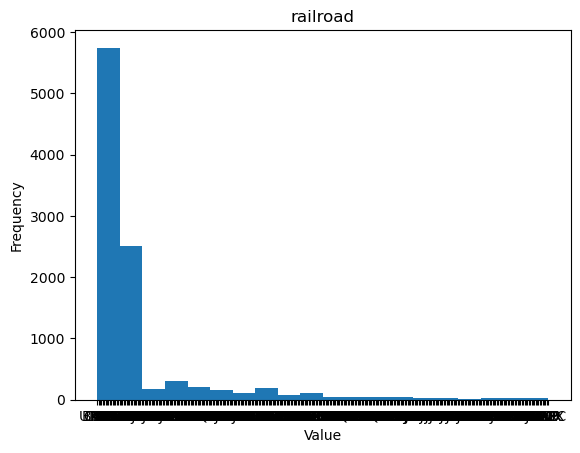

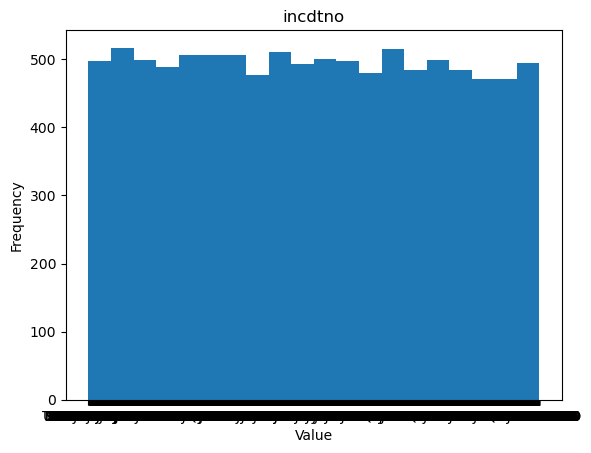

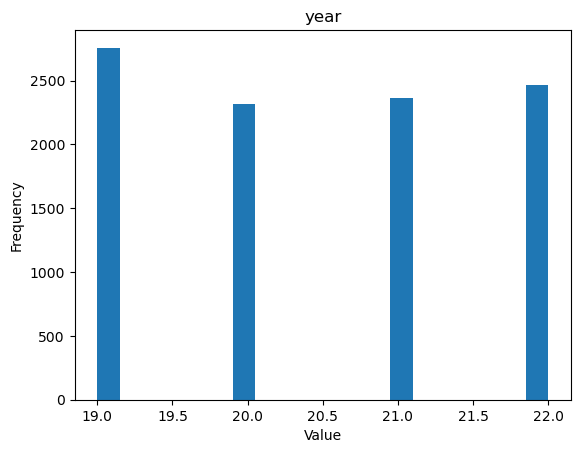

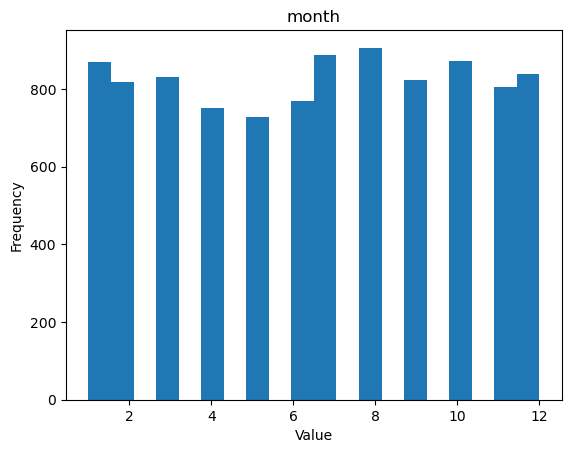

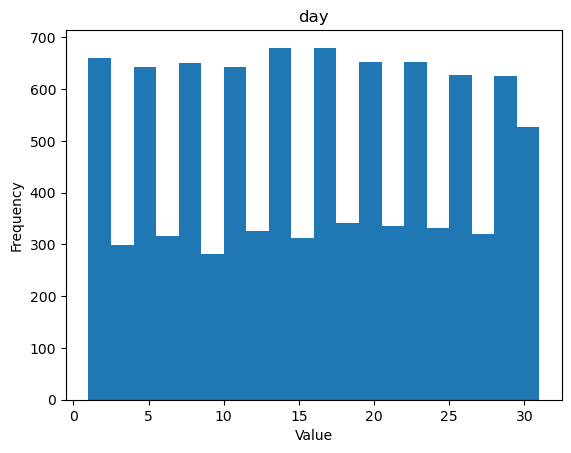

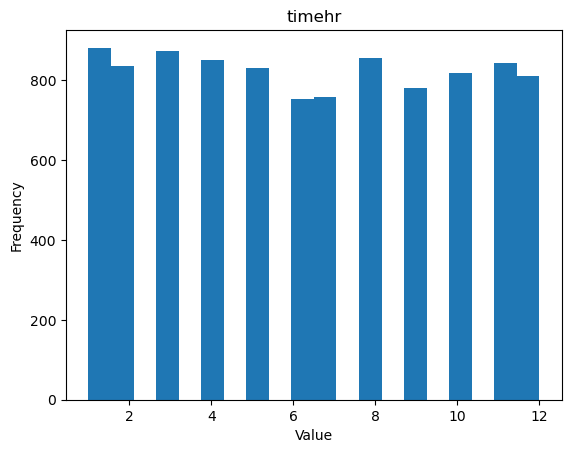

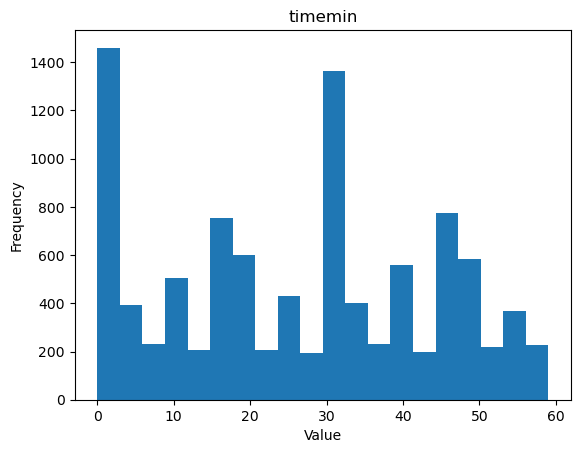

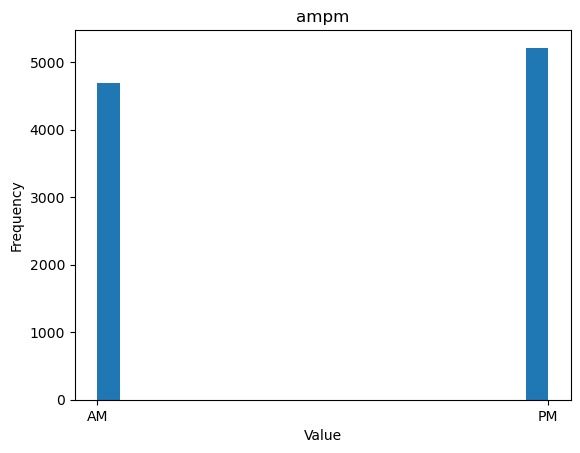

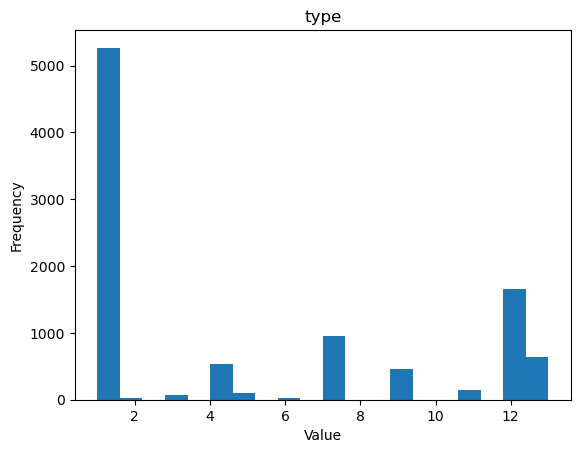

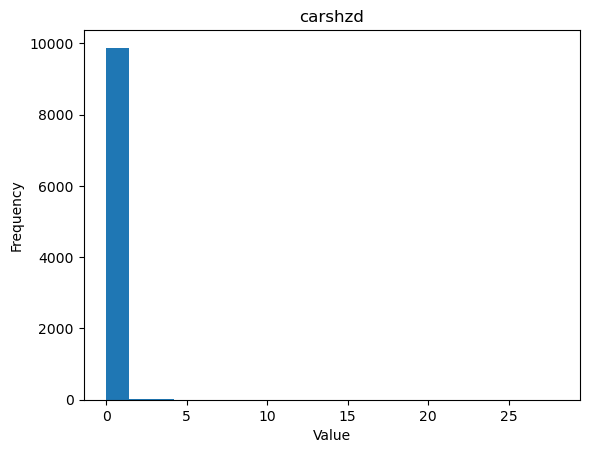

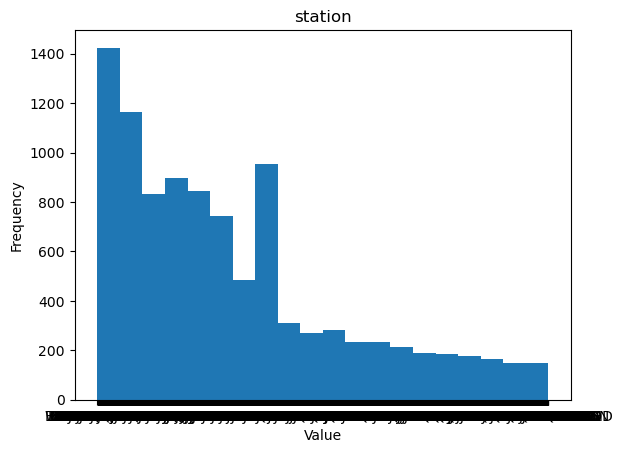

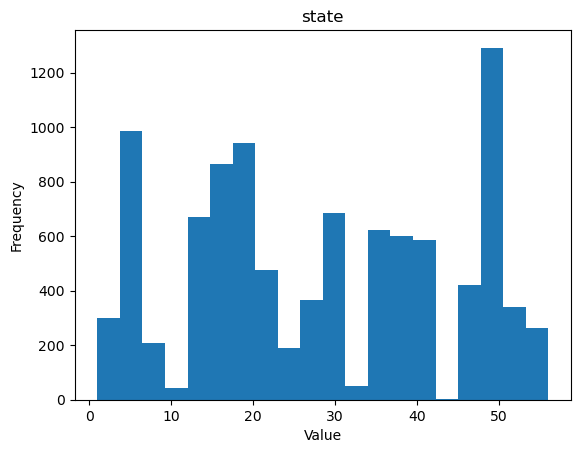

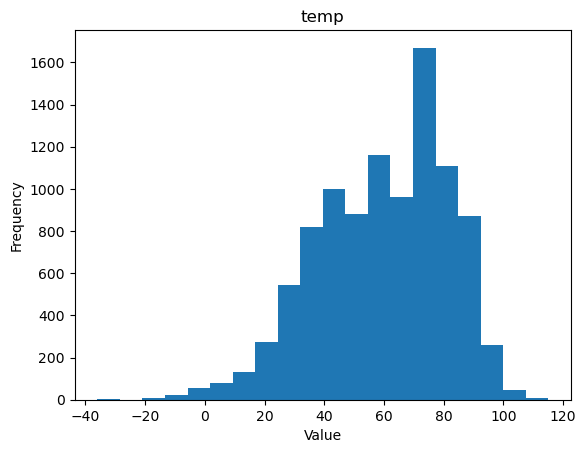

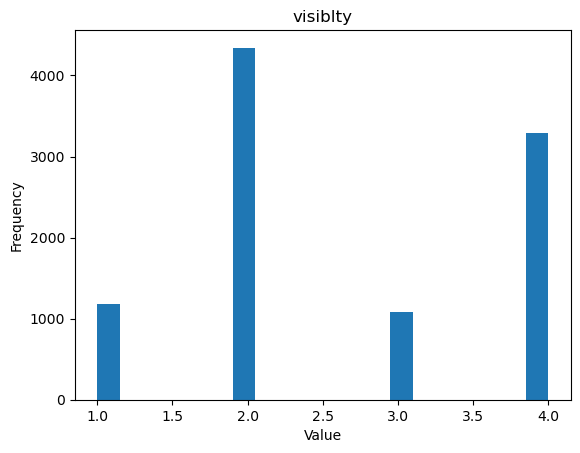

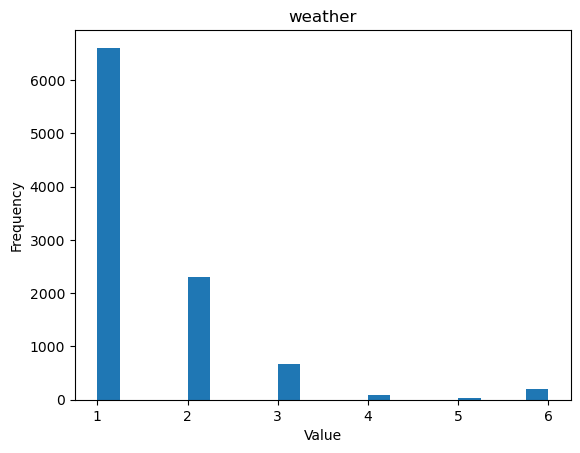

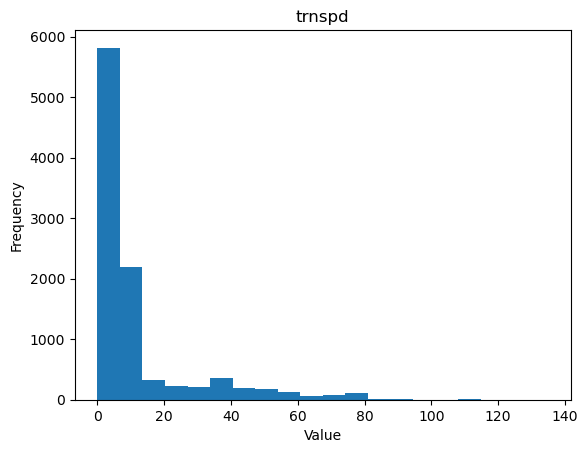

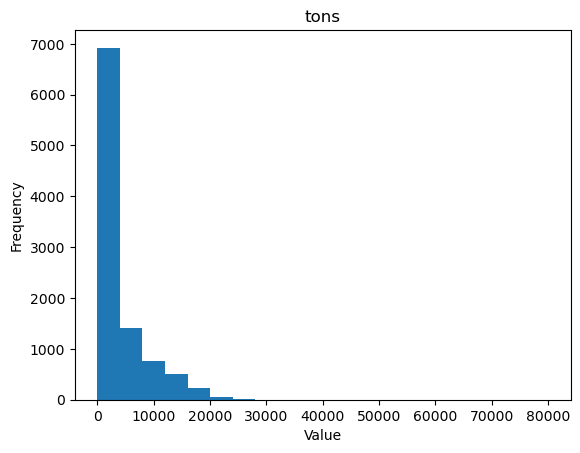

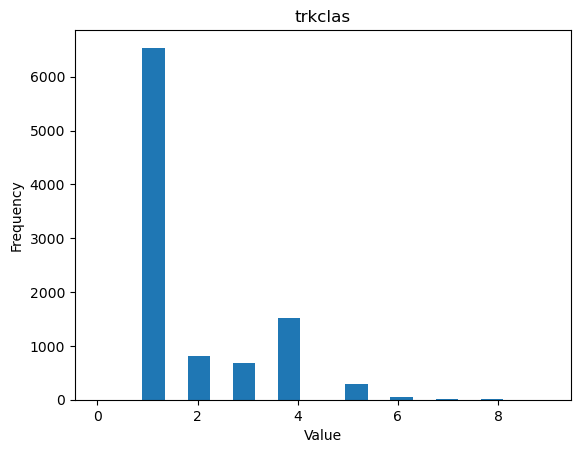

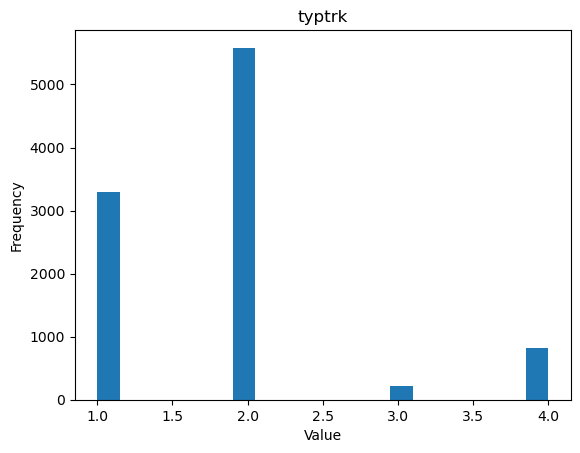

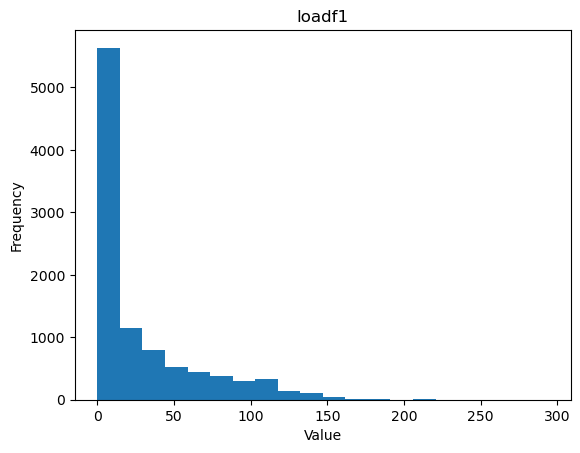

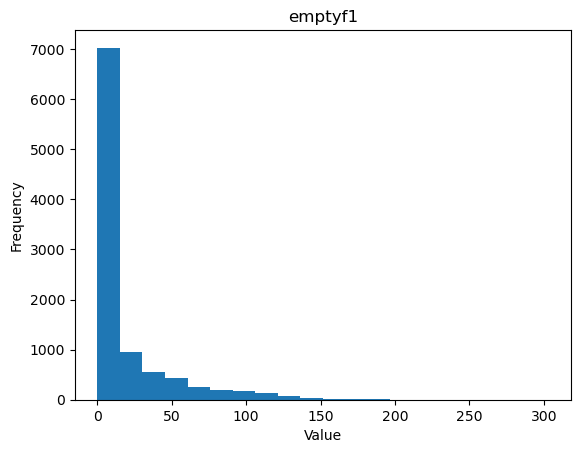

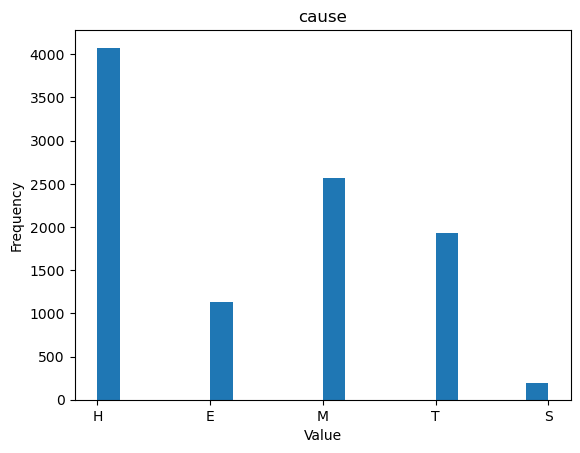

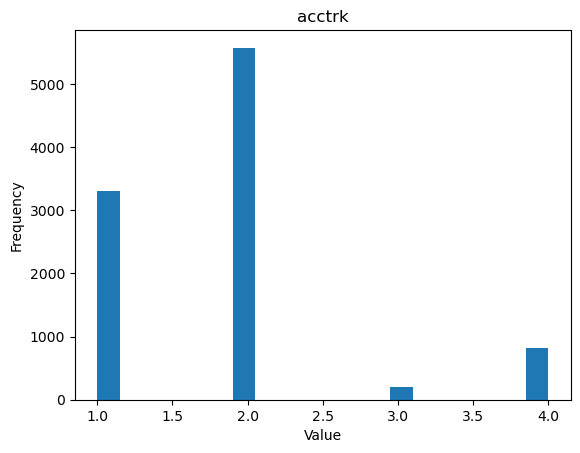

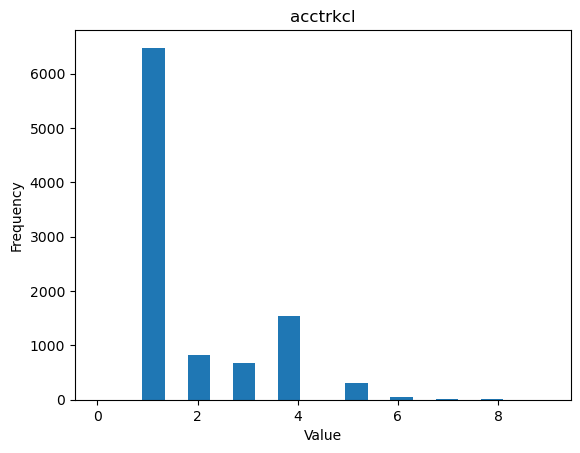

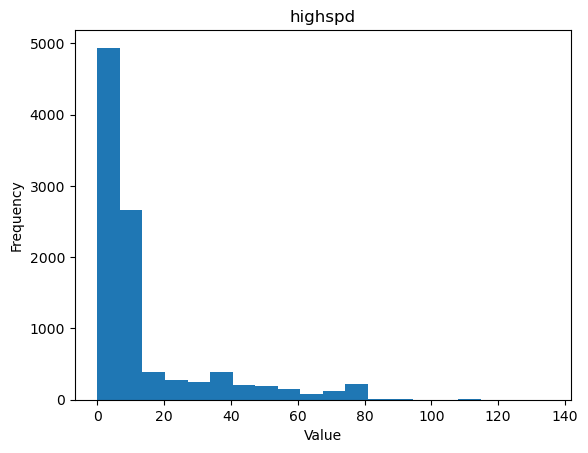

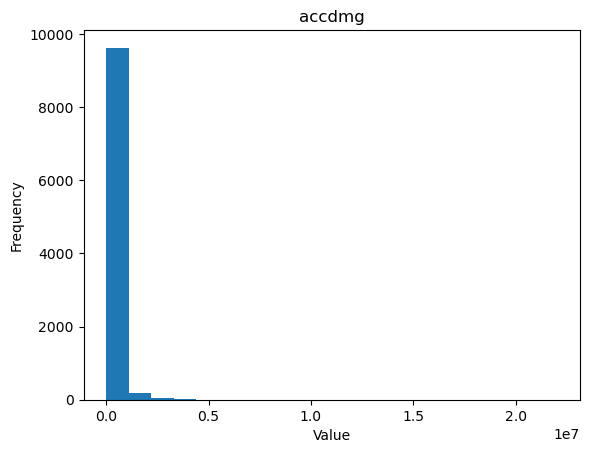

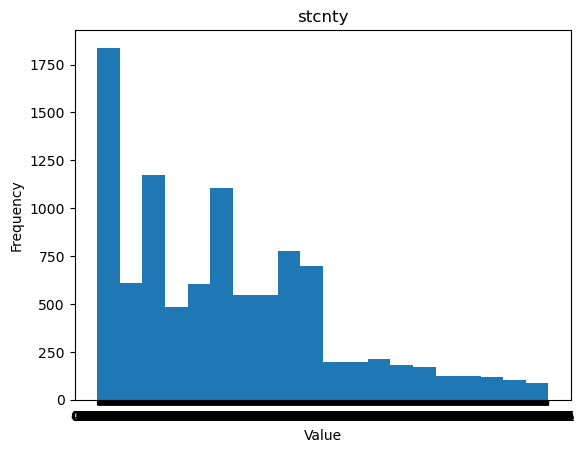

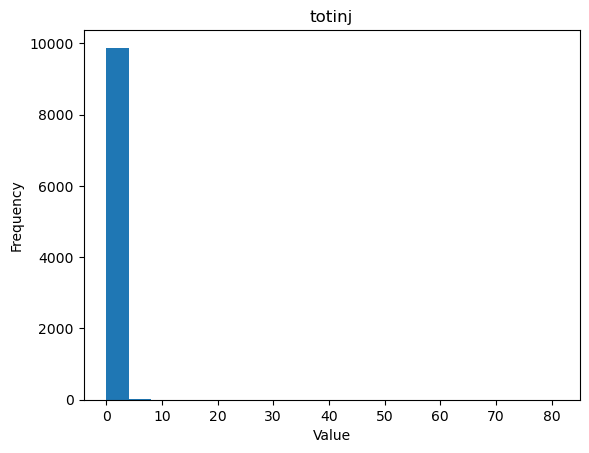

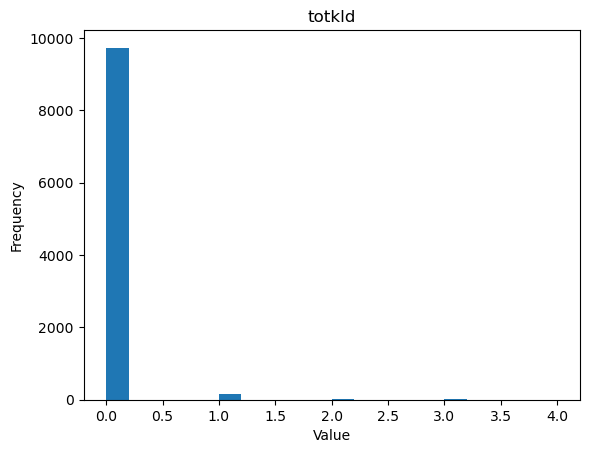

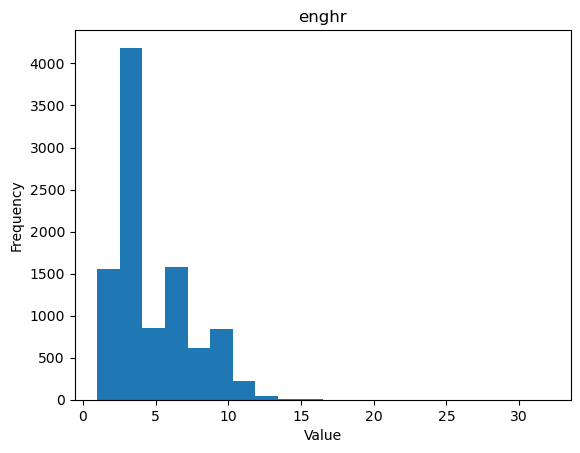

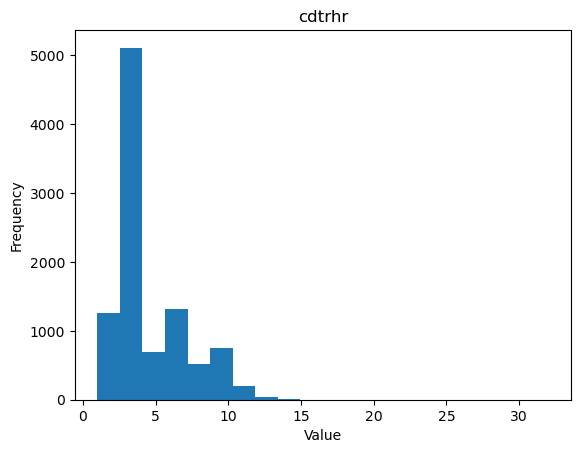

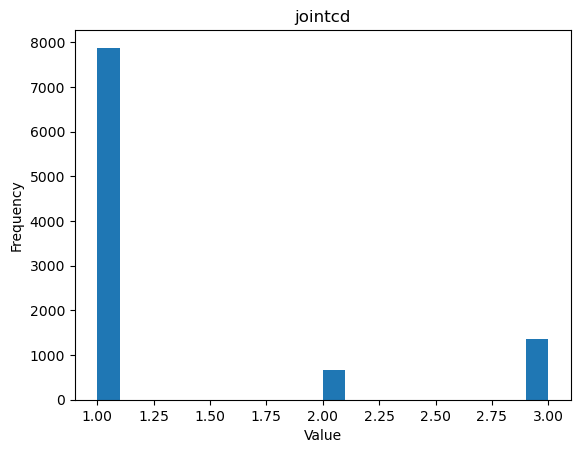

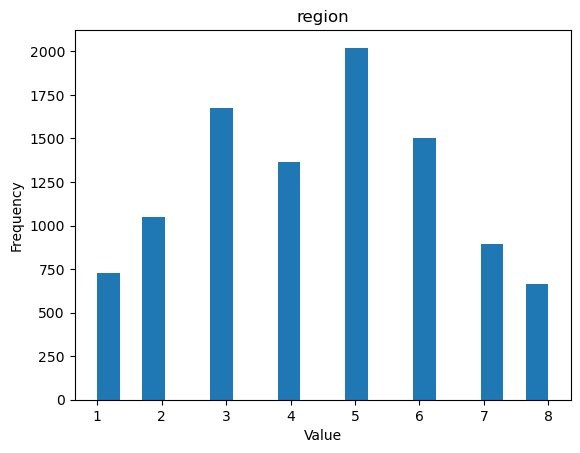

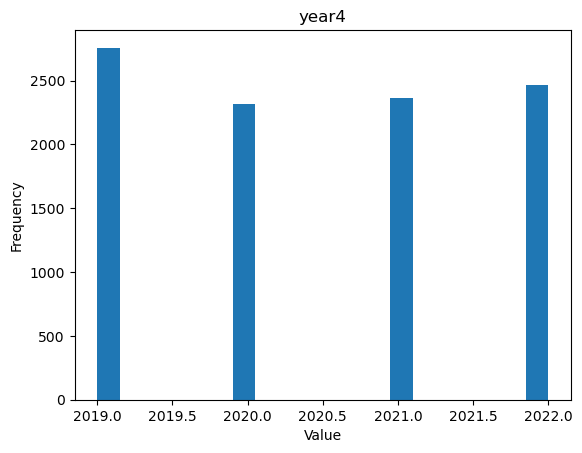

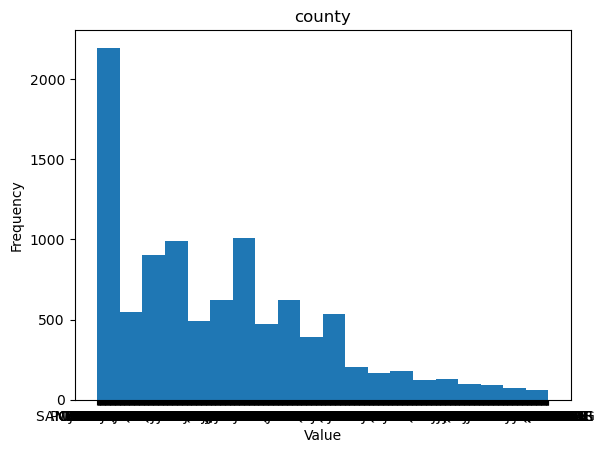

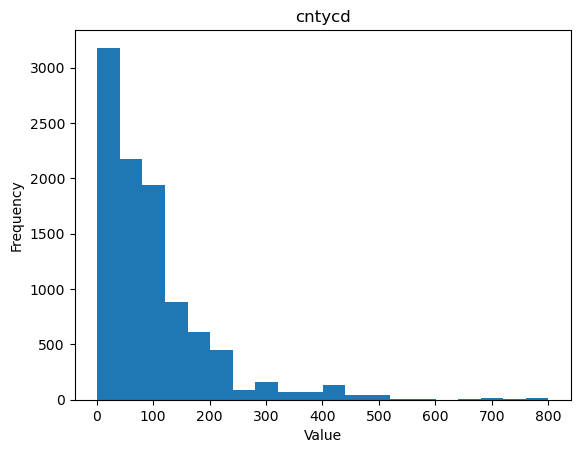

TypeError: 'value' must be an instance of str or bytes, not a float

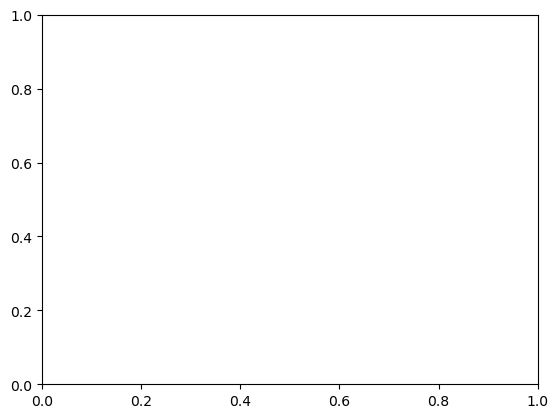

In [6]:
for col in df.columns:
    plt.hist(df[col], bins=20)
    plt.title(col)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

### Here is what I found:
* Year: fairly evenly distributed
* Month: fairly evenly distributed
* Day: on weekends rails are half as busy
* Timehr: evenly distributed
* AmPm: slightly more travel in the PM hours (~10%)
* Type: Type 1 (derailment) and Type 11 (object collision most frequent
* carshzd: very little hazardous material
* state: I believe CA and TX respectively have most accidents
* temp: beta distribution left tail 80F most frequent
* visibility: 1. clear 2. rain 3. poor 4. very poor
* weather 1. clear 2. rain 3. sleet-hail 4. snow 5. fog 6. wind
* trnspd: exponential distribution right tail 0-80 mph
* tons: exponential distribution 0-30K
* trkcls: 1 - 10mph max 2. -20mph max... 8. 80mph max
* typtrk - 1. freight 2. passenger 3. commuter 4. other
* cause - ~40% are human factor, next is mechanical/electric
* jointcd - is railjoint; 1. insulated 2. weld 3. joint

In [7]:
df.head()

,railroad,incdtno,year,month,day,timehr,timemin,ampm,type,carshzd,...,jointcd,region,year4,county,cntycd,narr1,narr2,narr3,latitude,longitud
0,UTAH,UTA022722D,22,3,6,10,0,AM,1,0,...,1,7,2022,UTAH,49,A TRAIN CREW WAS PULLING A CUT OF CARS OUT OF A YARD TRACK TO CLEAR A SWITCH AND THEN ...,IN THE ADJACENT TRACK. THE ENGINEER WAS LOOKING AT THE SWITCH TARGETS ON THE LEAD (LEF...,AILED TO NOTICE THE SWITCH ON THE RIGHT WAS LINED AGAINST THE MOVEMENT. SUBSEQUENTLY T...,40.222489,-111.650240
1,UP,0822MA007,22,8,4,2,10,AM,12,0,...,1,5,2022,CRAWFORD,33,THE CREW OF TRAIN MNLNP-03 FAILED TO PROTECT A SHOVING MOVEMENT DURING A SET OUT AT VA...,HE NORTH END OF YARD TRACK 2. THIS UNPROTECTED SHOVE RESULTED IN A COLLISION WITH A CU...,WAS PREVIOUSLY SET OUT IN THAT TRACK AT THE SOUTH END OF THE YARD. IN THE PROCESS OF D...,35.430071,-94.344022
2,UP,0822MA007,22,8,4,2,10,AM,12,0,...,3,5,2022,CRAWFORD,33,THE CREW OF TRAIN MNLNP-03 FAILED TO PROTECT A SHOVING MOVEMENT DURING A SET OUT AT VA...,HE NORTH END OF YARD TRACK 2. THIS UNPROTECTED SHOVE RESULTED IN A COLLISION WITH A CU...,WAS PREVIOUSLY SET OUT IN THAT TRACK AT THE SOUTH END OF THE YARD. IN THE PROCESS OF D...,35.430071,-94.344022
3,UP,0922NC005,22,9,5,11,12,PM,1,0,...,1,7,2022,PLACER,61,"MRVNP-05 WAS TRAVELING EAST ON MAIN TRACK 2, WHEN TRAIN TOOK UDE AT MP 159.19. TRAIN H...",CK 8 WITH NO AIR SET AND NO THROTTLE ADJUSTMENTS FOR APPROXIMATELY 6 MILES PRIOR TO UD...,"ECTION, CONDUCTOR FOUND DRAWBAR BETWEEN 12TH AND 13TH CARS HAD COME OUT AND DERAILED T...",39.198577,-120.772514
4,UP,0922NC008,22,9,8,10,30,AM,1,0,...,1,7,2022,TULARE,107,"SJVR CREW ON THE LGJGJJ-08, REPORTED THAT THEY DERAILED AT MP 239.19 ON THE FRESNO SUB...",THE GOSHEN SIDING. 3 CARS DERAILED DURING A SET OF SWITCHING MOVEMENTS BY THE CREW. NO...,"NJURIES REPORTED. DURING THE INVESTIGATION, IT WASFOUND THAT THE 3/738 SWITCH WAS RAN ...",36.350985,-119.420851


### Make call on dropped columns

In [8]:
# Drop the specified columns
df = df.drop(['railroad', 'carshzd', 'station', 'trkclas', 'typtrk', 'highspd', 'accdmg', 'totinj', 'totkld', 'county', 'stcnty', 'jointcd', 'region', 'year4', 'narr1', 'narr2', 'narr3', 'latitude', 'longitud'], axis=1)

# Save the modified dataframe to a new csv file
df.to_csv('RRD_US_combined_cleaned_reduced.csv', index=False)

In [9]:
df.head()

,incdtno,year,month,day,timehr,timemin,ampm,type,state,temp,...,trnspd,tons,loadf1,emptyf1,cause,acctrk,acctrkcl,enghr,cdtrhr,cntycd
0,UTA022722D,22,3,6,10,0,AM,1,49,33,...,5,3395,20,11,H,2,1,2,2,49
1,0822MA007,22,8,4,2,10,AM,12,5,81,...,0,5221,38,6,H,2,1,3,3,33
2,0822MA007,22,8,4,2,10,AM,12,5,81,...,9,9431,64,32,H,2,1,1,3,33
3,0922NC005,22,9,5,11,12,PM,1,6,83,...,14,6887,50,16,E,1,2,5,5,61
4,0922NC008,22,9,8,10,30,AM,1,6,73,...,0,0,0,0,H,3,3,4,4,107


In [10]:
# Convert the 'year' column to a 4-digit year
df['year'] = '20' + df['year'].astype(str)

In [11]:
df.head()

,incdtno,year,month,day,timehr,timemin,ampm,type,state,temp,...,trnspd,tons,loadf1,emptyf1,cause,acctrk,acctrkcl,enghr,cdtrhr,cntycd
0,UTA022722D,2022,3,6,10,0,AM,1,49,33,...,5,3395,20,11,H,2,1,2,2,49
1,0822MA007,2022,8,4,2,10,AM,12,5,81,...,0,5221,38,6,H,2,1,3,3,33
2,0822MA007,2022,8,4,2,10,AM,12,5,81,...,9,9431,64,32,H,2,1,1,3,33
3,0922NC005,2022,9,5,11,12,PM,1,6,83,...,14,6887,50,16,E,1,2,5,5,61
4,0922NC008,2022,9,8,10,30,AM,1,6,73,...,0,0,0,0,H,3,3,4,4,107


In [12]:
# Combine 'year', 'month', and 'day' columns into a single datetime column
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

In [13]:
df.sample(10)

,incdtno,year,month,day,timehr,timemin,ampm,type,state,temp,...,tons,loadf1,emptyf1,cause,acctrk,acctrkcl,enghr,cdtrhr,cntycd,date
8877,NW0819105,2019,8,7,1,0,PM,1,53,98,...,2268,12,22,H,2,1,1,1,21,2019-08-07
5900,CA0320109,2020,3,20,1,0,AM,1,6,41,...,0,0,0,M,2,1,2,3,71,2020-03-20
3625,0121SX029,2021,1,31,11,10,PM,1,48,51,...,0,0,0,H,2,1,4,3,323,2021-01-31
3452,0421SX017,2021,4,24,8,10,AM,1,48,58,...,6940,31,99,H,2,1,8,8,29,2021-04-24
6591,194611,2020,12,17,7,15,AM,12,36,16,...,0,0,1,M,2,1,3,3,1,2020-12-17
5523,CH0620103,2020,6,20,10,18,AM,1,17,90,...,2145,12,25,H,2,1,3,3,197,2020-06-20
7276,135328,2019,8,30,2,35,PM,5,34,84,...,0,2,0,H,1,4,7,7,35,2019-08-30
8156,1552,2019,11,29,6,0,PM,1,50,27,...,1690,13,0,E,2,1,10,10,23,2019-11-29
9357,135021,2019,8,3,8,0,PM,12,39,72,...,0,2,9,E,2,2,3,3,49,2019-08-03
2469,1222TO003,2022,12,3,6,10,AM,12,48,50,...,62,2,0,H,2,1,3,3,113,2022-12-03


In [14]:
df.shape

(9900, 23)

In [15]:
# Move the 'date' column to be the second column
cols = list(df.columns)
cols.remove('date')
cols.insert(1, 'date')
df = df[cols]

# Drop the 'year', 'month', and 'day' columns
df = df.drop(['year', 'month', 'day'], axis=1)

In [16]:
df.head()

,incdtno,date,timehr,timemin,ampm,type,state,temp,visiblty,weather,trnspd,tons,loadf1,emptyf1,cause,acctrk,acctrkcl,enghr,cdtrhr,cntycd
0,UTA022722D,2022-03-06,10,0,AM,1,49,33,2,6.0,5,3395,20,11,H,2,1,2,2,49
1,0822MA007,2022-08-04,2,10,AM,12,5,81,4,1.0,0,5221,38,6,H,2,1,3,3,33
2,0822MA007,2022-08-04,2,10,AM,12,5,81,4,1.0,9,9431,64,32,H,2,1,1,3,33
3,0922NC005,2022-09-05,11,12,PM,1,6,83,4,2.0,14,6887,50,16,E,1,2,5,5,61
4,0922NC008,2022-09-08,10,30,AM,1,6,73,2,1.0,0,0,0,0,H,3,3,4,4,107


In [17]:
# Encode the 'cause' target column
df['cause'] = (df['cause'] == 'H').astype(int)

In [18]:
df.head()

,incdtno,date,timehr,timemin,ampm,type,state,temp,visiblty,weather,trnspd,tons,loadf1,emptyf1,cause,acctrk,acctrkcl,enghr,cdtrhr,cntycd
0,UTA022722D,2022-03-06,10,0,AM,1,49,33,2,6.0,5,3395,20,11,1,2,1,2,2,49
1,0822MA007,2022-08-04,2,10,AM,12,5,81,4,1.0,0,5221,38,6,1,2,1,3,3,33
2,0822MA007,2022-08-04,2,10,AM,12,5,81,4,1.0,9,9431,64,32,1,2,1,1,3,33
3,0922NC005,2022-09-05,11,12,PM,1,6,83,4,2.0,14,6887,50,16,0,1,2,5,5,61
4,0922NC008,2022-09-08,10,30,AM,1,6,73,2,1.0,0,0,0,0,1,3,3,4,4,107


In [19]:
df.cause.value_counts()

0    5824
1    4076
Name: cause, dtype: int64

### Split the data

In [22]:
train, val, test = prep.split_data(df, train_size=0.6, val_size=0.2, test_size=0.2, random_state=123)


In [23]:
train.shape

(5939, 20)

In [24]:
val.shape

(1980, 20)